In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
with open('train_dataset.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

import pandas as pd
data = pd.read_csv('train_dataset.csv')
df = pd.DataFrame(data)

Y = df['CONDITION']

e = []
for elem in df:
    e.append(elem)

In [2]:
data["Condition"] = data.CONDITION.map({"H":0, "D":5})
data.drop("CONDITION", axis = 1,inplace = True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data)
df1_scaled = pd.DataFrame(X, columns=e)
df1_scaled

,Unnamed: 0,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.515244,1.00,0.25,0.00,0.25,0.00,0.00,0.50,0.50,0.00,0.50,0.00,0.00,1.0
1,0.822154,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.50,1.0
2,0.698171,0.50,0.25,0.00,0.00,0.00,0.00,0.50,0.50,0.25,0.25,0.00,0.25,1.0
3,0.082317,0.25,1.00,1.00,1.00,1.00,0.75,1.00,1.00,0.75,1.00,0.50,1.00,0.0
4,0.018293,0.50,0.50,0.25,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.25,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,0.233740,0.25,0.50,0.50,0.25,0.25,0.25,0.25,0.75,0.00,0.50,0.50,0.50,0.0
770,0.102642,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.0
771,0.738821,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.25,1.0
772,0.700203,0.50,0.75,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.25,0.00,0.25,1.0


In [4]:
honest = df1_scaled[df1_scaled['CONDITION'] == 0]
honest = honest.iloc[:,1:13]
dishonest = df1_scaled[df1_scaled['CONDITION'] == 1]
dishonest = dishonest.iloc[:,1:13]
honest

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
3,0.25,1.00,1.00,1.00,1.00,0.75,1.00,1.00,0.75,1.00,0.50,1.00
4,0.50,0.50,0.25,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.25,0.50
9,0.25,0.50,0.50,0.00,0.25,0.00,0.75,0.75,0.00,0.25,0.25,0.00
11,0.25,0.75,0.50,0.50,0.25,0.25,0.50,0.75,0.25,0.75,0.50,0.50
13,0.25,0.50,0.00,0.00,0.25,0.50,0.00,0.75,0.00,0.25,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.00,1.00,0.00,0.00,0.25,0.75,0.00,1.00,0.75,0.00,0.75,0.75
768,0.00,0.50,0.00,0.50,0.25,0.25,0.50,0.50,0.00,0.25,0.00,0.25
769,0.25,0.50,0.50,0.25,0.25,0.25,0.25,0.75,0.00,0.50,0.50,0.50
770,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.25


In [5]:
honest = np.array(honest)
dishonest = np.array(dishonest)

In [6]:
comp = np.zeros((387,12))
for i in range(0, honest.shape[0]):
  for j in range(0, honest.shape[1]):
    if j == 0:      # We consider that the first question is different from the others (Faking here implies giving an higher score)
      if honest[i][j] == dishonest[i][j]:
        comp[i][j] = 0
      elif honest[i][j] > dishonest[i][j]:
        comp[i][j] = 1
      else:
        comp[i][j] = -1
    else:
      if honest[i][j] == dishonest[i][j]:
        comp[i][j] = 0
      elif honest[i][j] < dishonest[i][j]:
        comp[i][j] = 1
      else:
        comp[i][j] = -1

print(comp[-1:])

[[-1.  1.  0.  0. -1. -1. -1.  1.  0.  1.  0.  0.]]


In [7]:
unchanged = np.zeros(387,)
for item in range(len(comp)):
  unchanged[item] = np.sum(comp[item,:]== -1)

In [8]:
tf = np.zeros((honest.shape[0], honest.shape[1]))

for column in range(honest.shape[1]):
  for row in range(honest.shape[0]):
    tf[row][column] = (np.sum(honest[:,column]==honest[row][column])/(honest.shape[0])) * np.log10(honest.shape[1]/(np.sum(honest==honest[row][column])))

In [9]:
tf1 = np.zeros((honest.shape[0], honest.shape[1]))

for column in range(honest.shape[1]):
  for row in range(honest.shape[0]):
    tf1[row][column] = (np.sum(dishonest[:,column]==dishonest[row][column])/(dishonest.shape[0])) * np.log10(dishonest.shape[1]/(np.sum(dishonest==dishonest[row][column])))

In [10]:
tfidf_honest = pd.DataFrame(tf,columns=e[1:13])
tfidf_honest

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
0,-0.954011,-0.092812,-0.021656,-0.030937,-0.027844,-0.167149,-0.077344,-0.145406,-0.124168,-0.068062,-0.289803,-0.015469
1,-0.338104,-0.598927,-0.687527,-0.559615,-0.149732,-0.724835,-0.548956,-0.463685,-0.751483,-0.559615,-0.602253,-0.400895
2,-0.954011,-0.598927,-0.270483,-0.660950,-0.682198,-0.846016,-0.448914,-0.821417,-0.914754,-0.559615,-0.602253,-0.576348
3,-0.954011,-0.663820,-0.270483,-0.371914,-0.682198,-0.724835,-0.487836,-0.821417,-0.751483,-0.415484,-0.289803,-0.400895
4,-0.954011,-0.598927,-0.835440,-0.660950,-0.682198,-0.241503,-0.338406,-0.821417,-0.914754,-0.559615,-0.289803,-0.576348
...,...,...,...,...,...,...,...,...,...,...,...,...
382,-0.401857,-0.092812,-0.835440,-0.660950,-0.682198,-0.167149,-0.338406,-0.145406,-0.124168,-0.396570,-0.281765,-0.272214
383,-0.401857,-0.598927,-0.835440,-0.371914,-0.682198,-0.724835,-0.487836,-0.463685,-0.914754,-0.559615,-0.766702,-0.708846
384,-0.954011,-0.598927,-0.270483,-0.559615,-0.682198,-0.724835,-0.548956,-0.821417,-0.914754,-0.473346,-0.289803,-0.400895
385,-0.401857,-0.142765,-0.835440,-0.660950,-0.100289,-0.846016,-0.338406,-0.132190,-0.914754,-0.396570,-0.766702,-0.708846


In [11]:
tfidf_dishonest = pd.DataFrame(tf1,columns=e[1:13])
tfidf_dishonest

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
0,-0.383781,-0.906408,-1.772234,-0.406854,-1.652892,-1.778202,-0.305642,-0.429551,-1.760300,-0.251948,-1.861741,-0.912969
1,-0.383781,-0.050498,-1.772234,-1.557418,-1.652892,-1.778202,-0.847331,-0.543008,-1.760300,-0.659206,-1.861741,-0.173473
2,-0.148691,-0.906408,-1.772234,-1.557418,-1.652892,-1.778202,-0.305642,-0.429551,-0.319303,-0.659206,-1.861741,-0.854908
3,-0.383781,-0.501238,-1.772234,-1.557418,-1.652892,-1.778202,-0.847331,-0.543008,-1.760300,-0.990542,-1.861741,-0.912969
4,-0.307041,-0.501238,-1.772234,-1.557418,-1.652892,-1.778202,-0.847331,-0.543008,-1.760300,-0.990542,-1.861741,-0.912969
...,...,...,...,...,...,...,...,...,...,...,...,...
382,-0.417698,-0.906408,-1.772234,-1.557418,-1.652892,-1.778202,-0.669506,-0.607706,-1.760300,-0.990542,-1.861741,-0.912969
383,-0.307041,-0.906408,-1.772234,-1.557418,-1.652892,-1.778202,-0.669506,-0.429551,-1.760300,-0.659206,-1.861741,-0.854908
384,-0.417698,-0.501238,-1.772234,-1.557418,-1.652892,-1.778202,-0.847331,-0.543008,-1.760300,-0.990542,-1.861741,-0.912969
385,-0.383781,-0.906408,-1.772234,-1.557418,-1.652892,-1.778202,-0.847331,-0.607706,-1.760300,-0.659206,-1.861741,-0.854908


In [12]:
model_dict = {"PSY": ["P1", "P3", "P5", "P10"], "NAR": ["N2", "N7", "N8", "N12"], "MAC": ["M4", "M6", "M9", "M11"]}

In [13]:
x = tfidf_honest.loc[:, model_dict['PSY']]
y = tfidf_honest.loc[:, model_dict['NAR']]
z = tfidf_honest.loc[:, model_dict['MAC']]

coord = np.array([x.mean(axis=1),y.mean(axis=1),z.mean(axis=1)]).T

In [14]:
x = tfidf_dishonest.loc[:, model_dict['PSY']]
y = tfidf_dishonest.loc[:, model_dict['NAR']]
z = tfidf_dishonest.loc[:, model_dict['MAC']]

coord1 = np.array([x.mean(axis=1),y.mean(axis=1),z.mean(axis=1)]).T

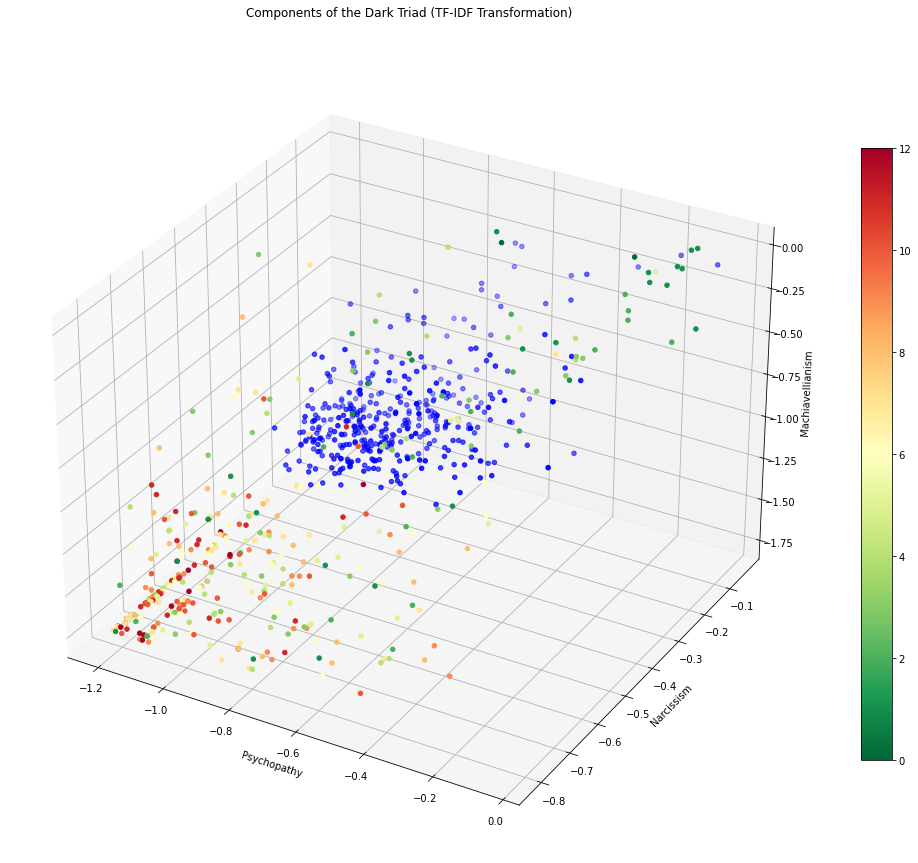

In [15]:
from mpl_toolkits import mplot3d

x = coord[:,0]
y = coord[:,1]
z = coord[:,2]

x1 = coord1[:,0]
y1 = coord1[:,1]
z1 = coord1[:,2]

fig = plt.figure(figsize = (18, 15))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, c='b', marker='o', label='Honest')
points=ax.scatter3D(x1, y1, z1, c=unchanged, marker='o', cmap='RdYlGn_r', alpha=1)
fig.colorbar(points, shrink=0.75)

ax.set_xlabel('Psychopathy')
ax.set_ylabel('Narcissism')
ax.set_zlabel('Machiavellianism')
plt.title('Components of the Dark Triad (TF-IDF Transformation)\n\n')
# plt.legend(loc='best')
plt.show()